In [76]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.model_selection import ParameterGrid

In [ ]:
# Load the daily bike sharing train data
df = pd.read_csv("../data/Daily Bike Sharing training.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [79]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [80]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)
# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(3)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False


In [82]:
# Renaming columns 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [83]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head(3)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False


#### EDA

In [84]:
# Create a copy of the df with index
df_temp = df.copy()
df_temp.set_index('ds', inplace = True)

In [85]:
# Set the frequency of the DataFrame index to daily ("D")
df_temp.index.freq = "D"
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq='D')

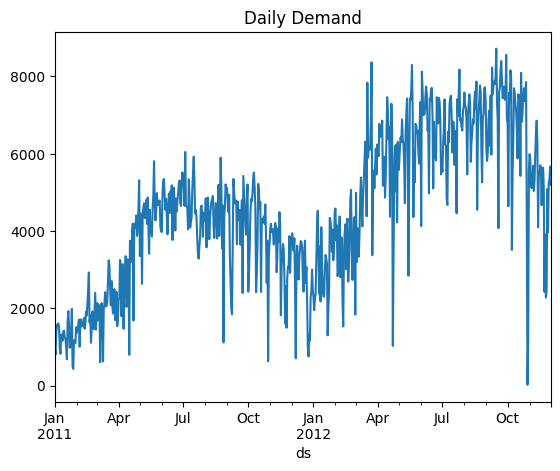

In [86]:
# Daily demand line plot
df_temp['y'].plot(title = 'Daily Demand')
plt.show()

C:\Users\amit.pawar\AppData\Local\Temp\ipykernel_14900\593307413.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df_temp['y'].resample('M').mean(),


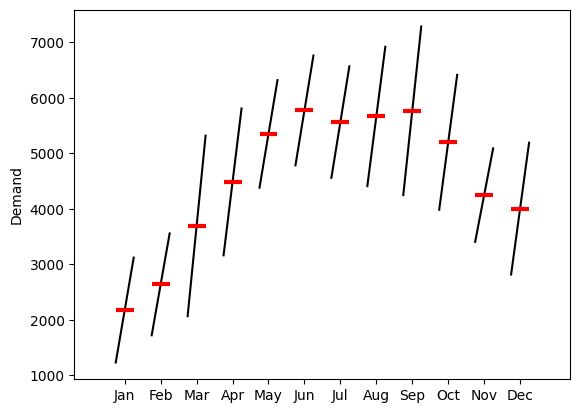

In [87]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of bike sharing demand
month_plot(df_temp['y'].resample('M').mean(),
           ylabel = 'Demand')
plt.show()

C:\Users\amit.pawar\AppData\Local\Temp\ipykernel_14900\1064772098.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_temp['y'].resample('Q').mean(),


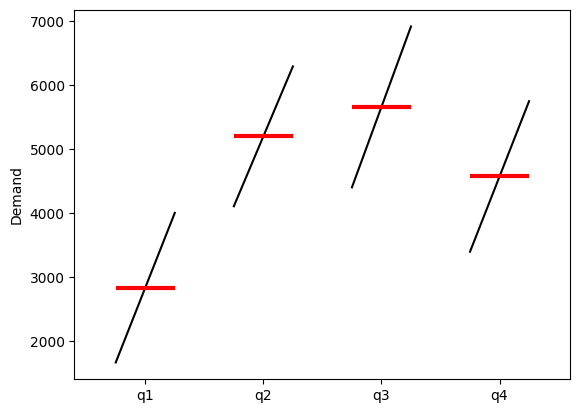

In [88]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of bike sharing demand
quarter_plot(df_temp['y'].resample('Q').mean(),
           ylabel = 'Demand')
plt.show()

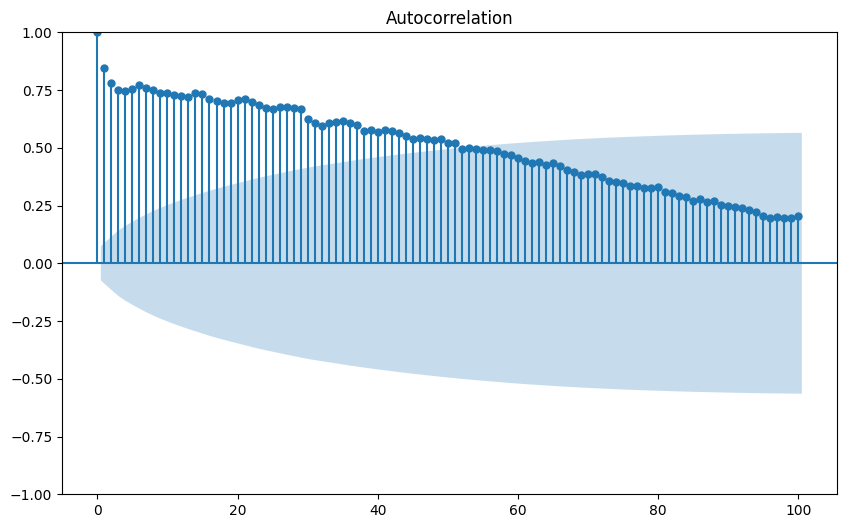

In [89]:
# Plot the autocorrelation (ACF) of bike sharing demand
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df_temp['y'], lags = 100, ax = ax)
plt.show()

ACF plot shows there's lot of information in the past that is significant

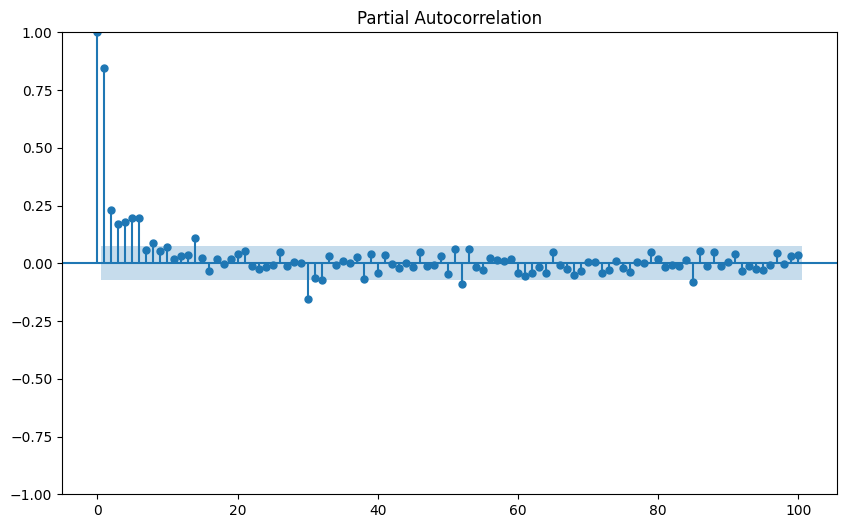

In [90]:
# Plot the partial autocorrelation (PACF) of bike sharing demand
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df_temp['y'], lags = 100, ax = ax)
plt.show()

There seems to be no weekly seasonality

#### Holidays

In [91]:
# Check the holidays in our df
df[df.holiday == 1].ds

16    2011-01-17
51    2011-02-21
104   2011-04-15
149   2011-05-30
184   2011-07-04
247   2011-09-05
282   2011-10-10
314   2011-11-11
327   2011-11-24
359   2011-12-26
366   2012-01-02
380   2012-01-16
415   2012-02-20
471   2012-04-16
513   2012-05-28
550   2012-07-04
611   2012-09-03
646   2012-10-08
681   2012-11-12
691   2012-11-22
Name: ds, dtype: datetime64[ns]

In [92]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [93]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


#### Prophet model

In [94]:
# Look at df
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False


In [95]:
# Remove any NAs
df = df.dropna()

In [96]:
df.head(2)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False


In [97]:
from prophet import Prophet

In [98]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,     # Include yearly seasonality
    weekly_seasonality=True,     # Include weekly seasonality
    holidays=holidays,           # Include holiday effects
    seasonality_mode="multiplicative",  # Use multiplicative seasonality
    seasonality_prior_scale=10,  # Increase flexibility of seasonality
    holidays_prior_scale=10,     # Increase impact of holidays
    changepoint_prior_scale=0.05 # Control flexibility in detecting trend changes
)

# Add additional regressors (external factors) to the model
m.add_regressor("workingday")    # Whether it's a working day
m.add_regressor("temp")          # Temperature
m.add_regressor("atemp")         # Apparent temperature
m.add_regressor("hum")           # Humidity
m.add_regressor("windspeed")     # Wind speed
m.add_regressor("weathersit_2")  # Weather situation category 2
m.add_regressor("weathersit_3")  # Weather situation category 3

# Fit the model to the data
m.fit(df)

15:28:20 - cmdstanpy - INFO - Chain [1] start processing
15:28:20 - cmdstanpy - INFO - Chain [1] done processing


In [99]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.334393,0.334393,0.334393
1,temp,multiplicative,0.502732,0.861474,0.861474,0.861474
2,atemp,multiplicative,0.480847,0.266764,0.266764,0.266764
3,hum,multiplicative,0.625717,-0.421533,-0.421533,-0.421533
4,windspeed,multiplicative,0.190534,-0.679274,-0.679274,-0.679274
5,weathersit_2,multiplicative,0.000000,-0.116122,-0.116122,-0.116122
6,weathersit_3,multiplicative,0.000000,-0.525632,-0.525632,-0.525632


In [100]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 33.44% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 86.15% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 26.68% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 42.15% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 67.93% (multiplicatively).
For each unit increase in weathersit_2, the target variable is expected to decrease by 11.61% (multiplicatively).
For each unit increase in weathersit_3, the target variable is expected to decrease by 52.56% (multiplicatively).


#### Cross Validation

In [101]:
from prophet.diagnostics import cross_validation

In [102]:
# How many days we have in the dataset
df.shape[0] -180

521

In [103]:
# Apply the CV to the model
df_cv = cross_validation(model = m,
                         period = '15 days',      # Step size between cutoff dates
                         initial = '521 days',    # Size of initial training period
                         horizon = '30 days',     # Forecast horizon
                         parallel ='processes')  # Use parallel processing for faster computation

In [104]:
# CV output
# yhat - the predicted value (forecast) for the target variable
# yhat_lower - lower bounds of the predicted forecast
# yhat_upper - upper bounds of the predicted forecast
# y - the actual observed values of the target variable
# cutoff - defines the point in time where the validation set begins

df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8131.997007,7456.309218,8837.828939,6211,2012-06-19
1,2012-06-21,8627.660081,7877.342851,9322.586597,5905,2012-06-19
2,2012-06-22,8309.184868,7609.268463,9008.563819,5823,2012-06-19
3,2012-06-23,7875.109422,7203.112940,8605.702670,7458,2012-06-19
4,2012-06-24,7937.263777,7230.503270,8642.987403,6891,2012-06-19


In [105]:
# Performance Metrics
# horizon - the number of time steps (periods) into the future for which predictions are made
# mse - mean squared error
# rmse - root mean squared error
# mae - mean absolute error
# mape - mean absolute percentage error
# mdape - median absolute percentage error
# smape - symmetric mean absolute percentage error
# coverage - the proportion of observed values (y) that fall within the forecast uncertainty intervals ('yhat_lower' to 'yhat_upper').

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.608850e+06,1268.404551,948.234921,0.164952,0.092979,0.158515,0.566667
1,4 days,1.502893e+06,1225.925206,897.178766,0.149528,0.079511,0.145776,0.600000
2,5 days,1.550600e+06,1245.230927,950.736095,0.154486,0.080270,0.149905,0.533333
3,6 days,1.187464e+06,1089.708308,872.972334,0.136935,0.108481,0.138104,0.566667
4,7 days,1.223522e+06,1106.129495,876.273156,0.133395,0.110223,0.138873,0.566667
5,8 days,9.762939e+05,988.075869,764.207738,0.107981,0.104449,0.117466,0.600000
6,9 days,9.226644e+05,960.554191,746.370856,0.103892,0.089982,0.111808,0.566667
7,10 days,1.408269e+06,1186.704965,905.088788,0.130773,0.108302,0.134310,0.500000
8,11 days,1.543714e+06,1242.462687,946.106448,0.141679,0.094352,0.142599,0.533333
9,12 days,2.058368e+06,1434.701400,1129.945442,4.068687,0.121798,0.224265,0.433333


In [106]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1320.0
The MAPE is 100.34 %


c:\Users\amit.pawar\.conda\envs\time_series\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\amit.pawar\.conda\envs\time_series\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


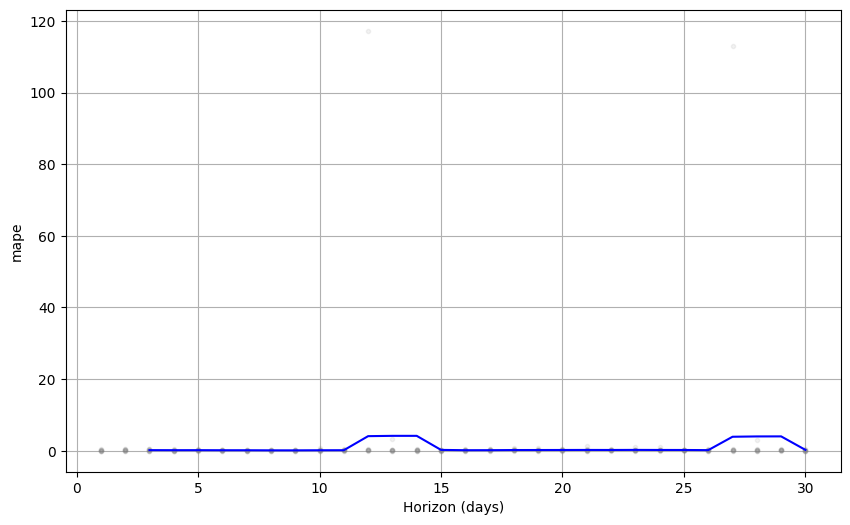

In [107]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

MAPE is huge , so we need to check this

#### Exploring the error

In [108]:
# Compute the Error / deviation
# absolute difference between predicted ('yhat') and actual ('y') values
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
# the percentage deviation of predicted from actual values
df_cv['deviation_%'] = (df_cv['yhat'] / df_cv['y'] - 1) *100

In [109]:
# Days with the highest percentage deviation
df_cv.sort_values(by = 'deviation_%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation_%
251,2012-10-29,2602.062702,1765.469762,3384.011849,22,2012-10-17,2580.062702,11727.557736
236,2012-10-29,2508.918952,1703.337391,3290.625315,22,2012-10-02,2486.918952,11304.177055
252,2012-10-30,4736.586275,3975.169404,5504.931624,1096,2012-10-17,3640.586275,332.170281
237,2012-10-30,4488.025892,3720.782588,5287.532458,1096,2012-10-02,3392.025892,309.491414
290,2012-11-22,5803.946779,4919.916238,6599.652690,2425,2012-11-01,3378.946779,139.338011
292,2012-11-24,4919.936894,4115.487844,5777.115265,2277,2012-11-01,2642.936894,116.071010
293,2012-11-25,5148.493175,4376.790791,5955.355412,2424,2012-11-01,2724.493175,112.396583
17,2012-07-07,8841.497852,8145.219443,9540.692512,4840,2012-06-19,4001.497852,82.675575
18,2012-07-08,8244.508301,7519.757889,8918.784795,4672,2012-06-19,3572.508301,76.466359
9,2012-06-29,9085.515170,8366.947757,9780.603867,5463,2012-06-19,3622.515170,66.309998


Massive deviation percent in 29th and 30th october cna be seen , we need to explore this

After checking the web, we saw this:
On October 29–30, 2012, Washington, D.C., experienced significant impacts from Hurricane Sandy, one of the most destructive hurricanes in U.S. history.


This caused massive disrupt in the data and as this does not ocur frequently we need to fix this by replacing with the previous day's value

In [111]:
# Look at 2012-10-29
df[df.ds == '2012-10-29']

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
667,2012-10-29,0,1,3,0.44,0.4394,0.88,0.3582,22,False,True


In [112]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

#### Feature Engineering

Purpose of lagged values:
- Time series often have autocorrelation, where past values influence future values. Lagged features allow the model to learn from these historical patterns.
- Lagged values give the model information about recent trends and behaviors.
- Lags at specific intervals (e.g., 7 days, 12 months) can help capture seasonal patterns.
- Many time series are autoregressive, where future values depend on past values. Lagged features directly model this dependency.


eg. Todays temperature might decide tomorrow's mood whether i want to ride a bike or notm




In [113]:
# Series.shift(n) - each value is moved to the n row(s) below its current position

# Create lagged values for the regressors 'temp' and 'atemp' with specified lags
for lag in [1,3,5,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)  # Create lagged values for 'temp'
  df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)  # Create lagged values for 'atemp'

df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1,atemp_lag_1,temp_lag_3,atemp_lag_3,temp_lag_5,atemp_lag_5,temp_lag_7,atemp_lag_7
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167,0.363625,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478,0.353739,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364,0.189405,0.344167,0.363625,NaN,NaN,NaN,NaN
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000,0.212122,0.363478,0.353739,NaN,NaN,NaN,NaN


In [114]:
# Correlation matrix between the lagged values and y
columns = ['y'] + [f'{var}_lag_{lag}' for var in ['temp', 'atemp'] for lag in [1,3,5,7]]
df[columns].corr()

,y,temp_lag_1,temp_lag_3,temp_lag_5,temp_lag_7,atemp_lag_1,atemp_lag_3,atemp_lag_5,atemp_lag_7
y,1.000000,0.590368,0.581922,0.589976,0.595830,0.586681,0.577076,0.587374,0.591886
temp_lag_1,0.590368,1.000000,0.892245,0.861173,0.864545,0.991526,0.882663,0.847990,0.852673
temp_lag_3,0.581922,0.892245,1.000000,0.891829,0.860613,0.877489,0.991519,0.882187,0.847451
temp_lag_5,0.589976,0.861173,0.891829,1.000000,0.891432,0.848465,0.877082,0.991490,0.881814
temp_lag_7,0.595830,0.864545,0.860613,0.891432,1.000000,0.853113,0.847940,0.876584,0.991475
atemp_lag_1,0.586681,0.991526,0.877489,0.848465,0.853113,1.000000,0.869430,0.836607,0.842372
atemp_lag_3,0.577076,0.882663,0.991519,0.877082,0.847940,0.869430,1.000000,0.868989,0.836076
atemp_lag_5,0.587374,0.847990,0.882187,0.991490,0.876584,0.836607,0.868989,1.000000,0.868539
atemp_lag_7,0.591886,0.852673,0.847451,0.881814,0.991475,0.842372,0.836076,0.868539,1.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            701 non-null    datetime64[ns]
 1   holiday       701 non-null    int64         
 2   workingday    701 non-null    int64         
 3   weathersit    701 non-null    int64         
 4   temp          701 non-null    float64       
 5   atemp         701 non-null    float64       
 6   hum           701 non-null    float64       
 7   windspeed     701 non-null    float64       
 8   y             701 non-null    int64         
 9   weathersit_2  701 non-null    bool          
 10  weathersit_3  701 non-null    bool          
 11  temp_lag_1    700 non-null    float64       
 12  atemp_lag_1   700 non-null    float64       
 13  temp_lag_3    698 non-null    float64       
 14  atemp_lag_3   698 non-null    float64       
 15  temp_lag_5    696 non-null    float64   

We will just keep temp_lag_1  as y has same correlation with other lag variables

In [116]:
# Kick out all lagged variables but the temp_lag1
df = df.iloc[:,:-7]
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000


In [117]:
# Remove any NAs
df = df.dropna()

In [118]:
df.shape

(700, 12)

In [119]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,     # Include yearly seasonality
    weekly_seasonality=True,     # Include weekly seasonality
    holidays=holidays,           # Include holiday effects
    seasonality_mode="multiplicative",  # Use multiplicative seasonality
    seasonality_prior_scale=10,  # Increase flexibility of seasonality
    holidays_prior_scale=10,     # Increase impact of holidays
    changepoint_prior_scale=0.05 # Control flexibility in detecting trend changes
)

# Add additional regressors (external factors) to the model
m.add_regressor("workingday")    # Whether it's a working day
m.add_regressor("temp")          # Temperature
m.add_regressor("atemp")         # Apparent temperature
m.add_regressor("hum")           # Humidity
m.add_regressor("windspeed")     # Wind speed
m.add_regressor("weathersit_2")  # Weather situation category 2
m.add_regressor("weathersit_3")  # Weather situation category 3
m.add_regressor("temp_lag_1")    # Temperature from previous time step

# Fit the model to the data
m.fit(df)

16:55:00 - cmdstanpy - INFO - Chain [1] start processing
16:55:01 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
## Regressor Coefficients
# regressor_coefficients() - used to extract and display the coefficients of the additional regressors added to the Prophet model.
# Positive coefficients indicate the regressor increases the target variable.
# Negative coefficients indicate the regressor decreases the target variable.
# The value of the coefficient represents the strength of the effect.

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.285471,0.285471,0.285471
1,temp,multiplicative,0.502959,1.061045,1.061045,1.061045
2,atemp,multiplicative,0.481015,0.364785,0.364785,0.364785
3,hum,multiplicative,0.625459,-0.392745,-0.392745,-0.392745
4,windspeed,multiplicative,0.190577,-0.543552,-0.543552,-0.543552
5,weathersit_2,multiplicative,0.000000,-0.103571,-0.103571,-0.103571
6,weathersit_3,multiplicative,0.000000,-0.417420,-0.417420,-0.417420
7,temp_lag_1,multiplicative,0.503024,-0.529883,-0.529883,-0.529883


In [121]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 28.55% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 106.10% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 36.48% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 39.27% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 54.36% (multiplicatively).
For each unit increase in weathersit_2, the target variable is expected to decrease by 10.36% (multiplicatively).
For each unit increase in weathersit_3, the target variable is expected to decrease by 41.74% (multiplicatively).
For each unit increase in temp_lag_1, the target variable is expected to decrease by 52.99% (multiplicatively).


In [122]:
# How many days we have in the dataset
df.shape[0] -180

520

In [123]:
# Apply the CV to the model
df_cv = cross_validation(model = m,
                         period = '15 days',      # Step size between cutoff dates
                         initial = '521 days',    # Size of initial training period
                         horizon = '30 days',     # Forecast horizon
                         parallel ='processes')  # Use parallel processing for faster computation

In [124]:
# CV output
# yhat - the predicted value (forecast) for the target variable
# yhat_lower - lower bounds of the predicted forecast
# yhat_upper - upper bounds of the predicted forecast
# y - the actual observed values of the target variable
# cutoff - defines the point in time where the validation set begins

df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8218.520655,7526.537197,8919.853671,6211,2012-06-19
1,2012-06-21,8509.614740,7878.476013,9188.425720,5905,2012-06-19
2,2012-06-22,8150.600279,7438.174714,8849.530893,5823,2012-06-19
3,2012-06-23,7741.009615,7036.493204,8471.008854,7458,2012-06-19
4,2012-06-24,7887.477627,7211.039620,8540.333553,6891,2012-06-19


In [125]:
# Performance Metrics
# horizon - the number of time steps (periods) into the future for which predictions are made
# mse - mean squared error
# rmse - root mean squared error
# mae - mean absolute error
# mape - mean absolute percentage error
# mdape - median absolute percentage error
# smape - symmetric mean absolute percentage error
# coverage - the proportion of observed values (y) that fall within the forecast uncertainty intervals ('yhat_lower' to 'yhat_upper').

from prophet.diagnostics import performance_metrics
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.580510e+06,1257.183473,984.476759,0.172795,0.128517,0.164261,0.533333
1,4 days,1.400682e+06,1183.503951,915.766466,0.154033,0.113506,0.149267,0.533333
2,5 days,1.457602e+06,1207.311888,955.347593,0.156597,0.108993,0.151839,0.500000
3,6 days,1.138679e+06,1067.089172,845.252495,0.132303,0.084908,0.133399,0.533333
4,7 days,1.233839e+06,1110.783193,860.266278,0.130481,0.084908,0.134793,0.566667
5,8 days,9.848295e+05,992.385785,748.912628,0.105376,0.077424,0.113161,0.600000
6,9 days,9.413606e+05,970.237380,750.499774,0.105997,0.079978,0.112296,0.600000
7,10 days,1.376532e+06,1173.256981,868.945700,0.126481,0.086990,0.128969,0.533333
8,11 days,1.466370e+06,1210.937616,886.041793,0.132664,0.093215,0.132955,0.566667
9,12 days,1.898931e+06,1378.016884,1053.116189,0.165548,0.111727,0.168685,0.466667


In [126]:
# RMSE and MAPE
rmse = round(performance_metrics(df_cv)['rmse'].mean(),0)
mape = round(performance_metrics(df_cv)['mape'].mean()* 100 ,2)
print(f"The RMSE is {rmse}")
print(f"The MAPE is {mape} %")

The RMSE is 1256.0
The MAPE is 15.79 %


c:\Users\amit.pawar\.conda\envs\time_series\lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\amit.pawar\.conda\envs\time_series\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


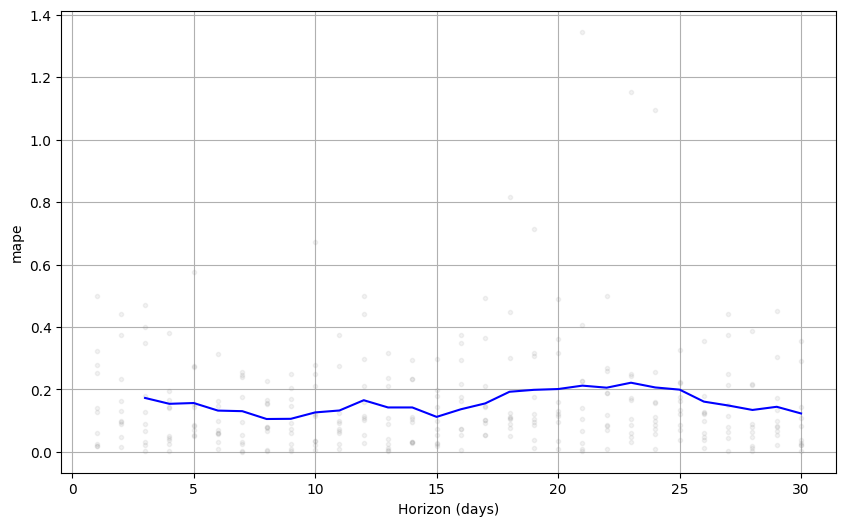

In [127]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric = 'mape');

We have reduced the MAPE from 100% to 16%

#### Parameter tuning

In [128]:
# Define the parameter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.5],
    'seasonality_prior_scale': [10, 20],
    'holidays_prior_scale': [10, 20],
    'seasonality_mode' : ['additive', 'multiplicative']
}

In [129]:
# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))
all_params

[{'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 10,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 20},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 20,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prio

In [130]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for the Parameter Tuning
for params in all_params:

  # build the model
  m = Prophet(
      yearly_seasonality=True,
      weekly_seasonality= True,
      holidays = holidays,
      **params)
  m.add_regressor("workingday")
  m.add_regressor("temp")
  m.add_regressor("atemp")
  m.add_regressor("hum")
  m.add_regressor("windspeed")
  m.add_regressor("weathersit_2")
  m.add_regressor("weathersit_3")
  m.add_regressor("temp_lag_1")
  m.fit(df)

  # Cross-Validation
  df_cv = cross_validation(model = m,
                          period = '15 days',
                          initial = '521 days',
                          horizon = '30 days',
                          parallel ='processes')


  # Compute and Store the Error
  rmse = performance_metrics(df_cv)['rmse'].mean()
  tuning_results.append(rmse)

16:57:51 - cmdstanpy - INFO - Chain [1] start processing
16:57:51 - cmdstanpy - INFO - Chain [1] done processing
16:57:55 - cmdstanpy - INFO - Chain [1] start processing
16:57:55 - cmdstanpy - INFO - Chain [1] done processing
16:58:00 - cmdstanpy - INFO - Chain [1] start processing
16:58:00 - cmdstanpy - INFO - Chain [1] done processing
16:58:05 - cmdstanpy - INFO - Chain [1] start processing
16:58:05 - cmdstanpy - INFO - Chain [1] done processing
16:58:10 - cmdstanpy - INFO - Chain [1] start processing
16:58:10 - cmdstanpy - INFO - Chain [1] done processing
16:58:14 - cmdstanpy - INFO - Chain [1] start processing
16:58:14 - cmdstanpy - INFO - Chain [1] done processing
16:58:19 - cmdstanpy - INFO - Chain [1] start processing
16:58:19 - cmdstanpy - INFO - Chain [1] done processing
16:58:24 - cmdstanpy - INFO - Chain [1] start processing
16:58:24 - cmdstanpy - INFO - Chain [1] done processing
16:58:31 - cmdstanpy - INFO - Chain [1] start processing
16:58:31 - cmdstanpy - INFO - Chain [1]

In [131]:
# Parameter Tuning outcome
outcome = pd.DataFrame(all_params)
outcome['tuning_results'] = tuning_results
outcome

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
0,0.05,10,additive,10,984.579404
1,0.05,10,additive,20,981.523454
2,0.05,10,multiplicative,10,1256.023623
3,0.05,10,multiplicative,20,1260.157161
4,0.05,20,additive,10,984.411778
5,0.05,20,additive,20,986.828747
6,0.05,20,multiplicative,10,1262.042163
7,0.05,20,multiplicative,20,1268.817151
8,0.50,10,additive,10,1146.530205
9,0.50,10,additive,20,1137.570381


In [132]:
# Fetch the best params
best_params = all_params[tuning_results.index(min(tuning_results))]

#### Predicting the future

In [ ]:
# Load the daily bike sharing training data
df_train = pd.read_csv("../data/Daily Bike Sharing training.csv")
# Load the daily bike sharing future data
df_future = pd.read_csv("../data/Prophet/Daily Bike Sharing future.csv")

# concat both together
df = pd.concat([df_train, df_future])
df.reset_index(drop = True, inplace = True)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,NaN,NaN,NaN
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,NaN,NaN,NaN
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,NaN,NaN,NaN
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,NaN,NaN
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,NaN,NaN,NaN


In [134]:
# Change the time Series variable name
# target variable as 'y'
# date as 'ds'
df = df.rename(columns = {'cnt': 'y',
                          'dteday': 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [135]:
# Change 'ds' into format YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'], format = "%m/%d/%Y")
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [136]:
# Prepare the weather situation variable

# Create dummy variables for the categorical column 'weathersit' in DataFrame 'df'
# 'drop_first=True' drops the first category
weather_sit = pd.get_dummies(df['weathersit'], drop_first = True)

# Concatenate the original DataFrame 'df' with the dummy variables 'weather_sit'
df = pd.concat([df, weather_sit], axis = 1)
df.head(0)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3


In [137]:
# Renaming variables 2 and 3
df = df.rename(columns = {2: 'weathersit_2',
                          3: 'weathersit_3'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,False,False


In [138]:
# Drop Variables That Are Not Needed
df.drop(columns = ['instant', 'season', 'yr', 'mnth', 'weekday',
                   'casual', 'registered'], inplace = True)
df.head()

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False
1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801.0,True,False
2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False
3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False
4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False


In [139]:
# Replace 29/30 of October 2012 with the values of 28th
# 28th because in EDA weekly seasonality is not obvious
to_replace = df.loc[df.ds == '2012-10-28'].y.values[0]
df.loc[df.ds == '2012-10-29', 'y'] = to_replace
df.loc[df.ds == '2012-10-30', 'y'] = to_replace

In [140]:
# Define holiday events
# general holiday
gen_holidays = pd.DataFrame({'holiday': 'gen_holi',
                             'ds': df[df.holiday == 1].ds,
                             'lower_window': -2,
                             'upper_window': 2})
# Christmas
xmas = pd.DataFrame({'holiday': 'christmas',
                     'ds': pd.to_datetime(['2011-12-24', '2012-12-24']),
                             'lower_window': -5,
                             'upper_window': 3})
# New Year's Eve
nye = pd.DataFrame({'holiday': 'new_years',
                     'ds': pd.to_datetime(['2011-12-31', '2012-12-31']),
                             'lower_window': -3,
                             'upper_window': 3})
# Easter
easter = pd.DataFrame({'holiday': 'easter',
                     'ds': pd.to_datetime(['2011-04-24', '2012-04-08']),
                     'lower_window': -3,
                             'upper_window': 3})

In [141]:
# Combine all the holidays
holidays = pd.concat([gen_holidays, xmas, nye, easter])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


In [142]:
# Creating lagged values for the regressors
lag = 1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head(1)

,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3,temp_lag_1
0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985.0,True,False,NaN


In [143]:
# Just the train data (excluding last 30 points)
train = df.iloc[:-30]

In [144]:
# Remove any NAs
train = train.dropna()

In [145]:
# Building the Prophet model
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality= True,
    holidays = holidays,
    **best_params)
m.add_regressor("workingday")
m.add_regressor("temp")
m.add_regressor("atemp")
m.add_regressor("hum")
m.add_regressor("windspeed")
m.add_regressor("weathersit_2")
m.add_regressor("weathersit_3")
m.add_regressor("temp_lag_1")
m.fit(train)

17:15:10 - cmdstanpy - INFO - Chain [1] start processing
17:15:10 - cmdstanpy - INFO - Chain [1] done processing


In [146]:
# Drop columns 'ds' and 'y' from DataFrame df to create future_regressors
future_regressors = df.drop(columns = ['ds', 'y'])
# Drop rows with missing values (NaNs) from future_regressors
future_regressors = future_regressors.dropna()
# Reset the index
future_regressors.reset_index(drop = True, inplace = True)

In [147]:
# Create a future dataframe using Prophet's make_future_dataframe method
future = m.make_future_dataframe(periods = 30)
# Concatenate future dataframe with future_regressors along axis 1 (columns)
future = pd.concat([future, future_regressors], axis = 1)

In [148]:
# Using the Prophet model to generate predictions for future timestamps
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,atemp,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
725,2012-12-27,6543.879059,2133.784219,3802.364142,6543.259867,6544.530664,-3589.739251,-3589.739251,-3589.739251,-366.444874,...,639.81325,639.81325,639.81325,-464.065847,-464.065847,-464.065847,0.0,0.0,0.0,2954.139808
726,2012-12-28,6549.965372,3621.069288,5387.105357,6549.310288,6550.662998,-2046.043613,-2046.043613,-2046.043613,-325.526585,...,639.81325,639.81325,639.81325,-477.959330,-477.959330,-477.959330,0.0,0.0,0.0,4503.921759
727,2012-12-29,6556.051685,3292.822455,4958.968808,6555.364083,6556.817056,-2410.031264,-2410.031264,-2410.031264,-343.744184,...,0.00000,0.00000,0.00000,-492.252800,-492.252800,-492.252800,0.0,0.0,0.0,4146.020421
728,2012-12-30,6562.137998,3345.102880,5099.879218,6561.420261,6562.952138,-2342.370048,-2342.370048,-2342.370048,-359.158411,...,0.00000,0.00000,0.00000,-506.562045,-506.562045,-506.562045,0.0,0.0,0.0,4219.767950
729,2012-12-31,6568.224311,2380.159689,4098.573117,6567.484792,6569.082016,-3390.166979,-3390.166979,-3390.166979,-370.989910,...,639.81325,639.81325,639.81325,-520.525877,-520.525877,-520.525877,0.0,0.0,0.0,3178.057332


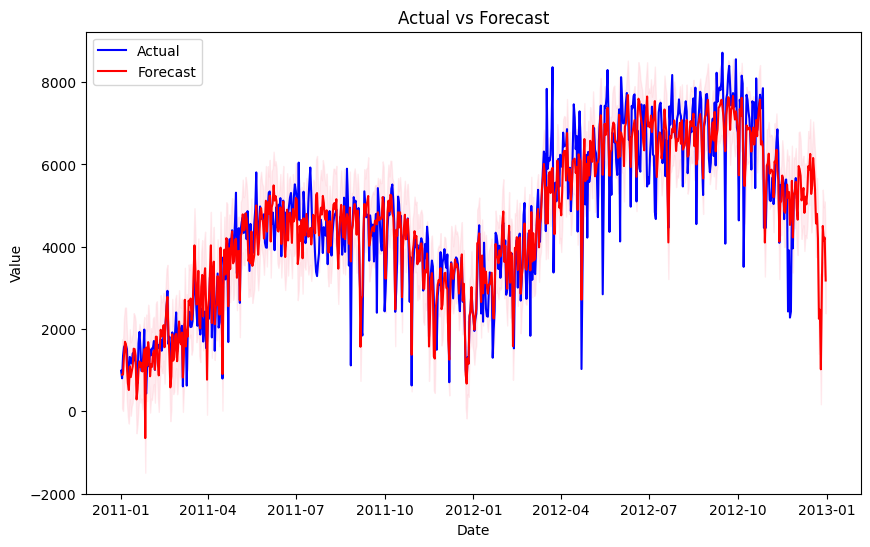

In [149]:
# Visualize time series plot
plt.figure(figsize=(10, 6))
# Plot actual and forecasted values
plt.plot(df['ds'], df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
# Fill the uncertainty interval (between yhat_lower and yhat_upper) with a pink color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
# add title, xlabel, ylabel, legend
plt.title('Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

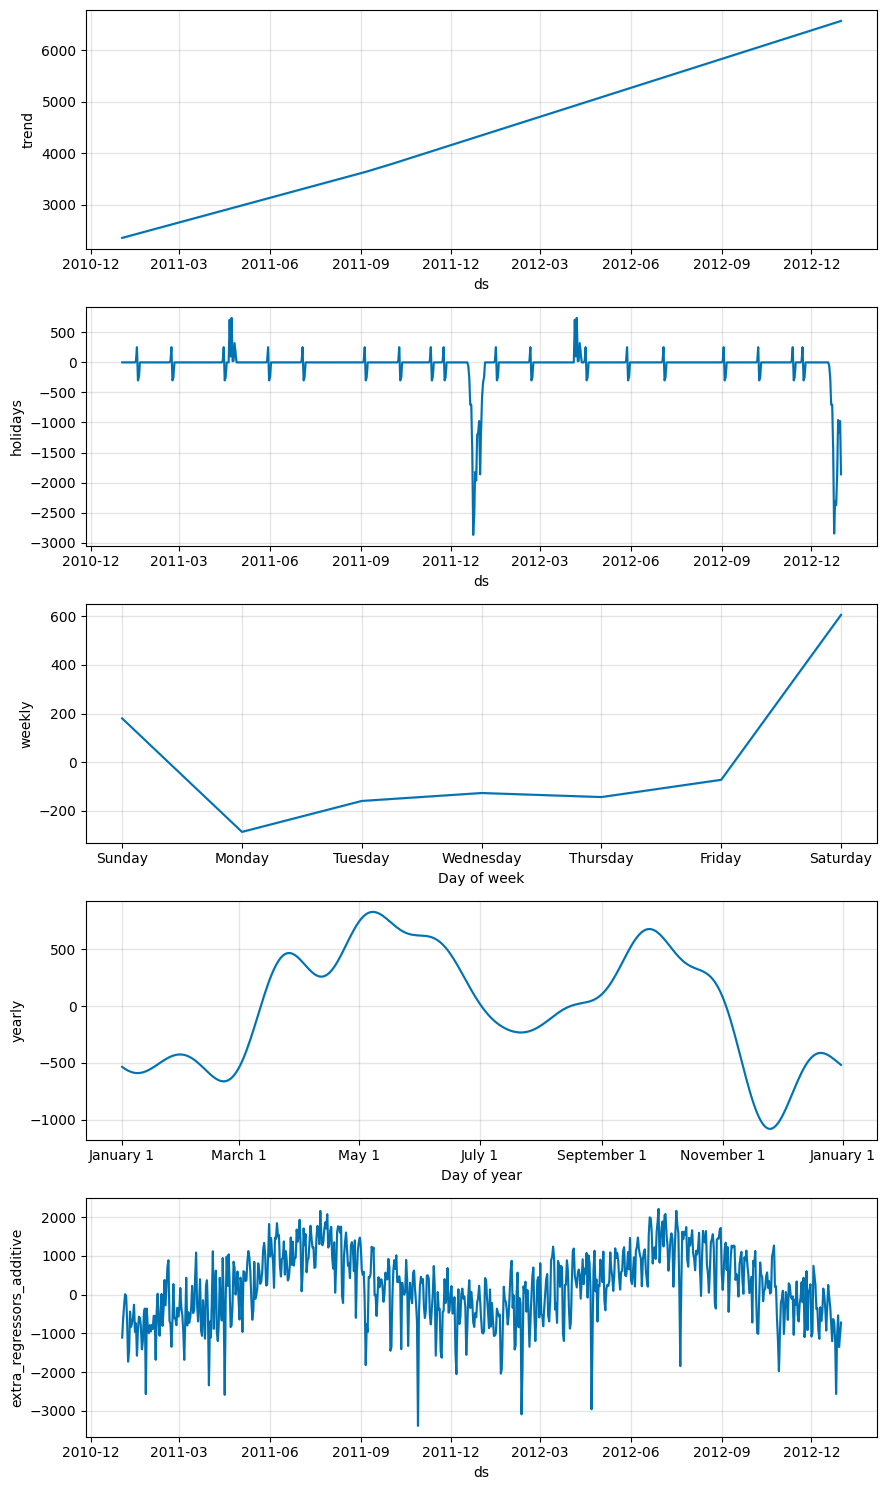

In [150]:
# Visualize components plot
# 1. Trend: Shows the overall trend of the time series over time.
# 2. Holidays : Shows the effect of holidays on the forecast.
# 3. Weekly Seasonality: Shows patterns that repeat weekly.
# 4. Yearly Seasonality: Displays patterns that repeat annually.
# 4. Other Regressors: Displays the impact of additional regressors added to the model.
m.plot_components(forecast)
plt.show()

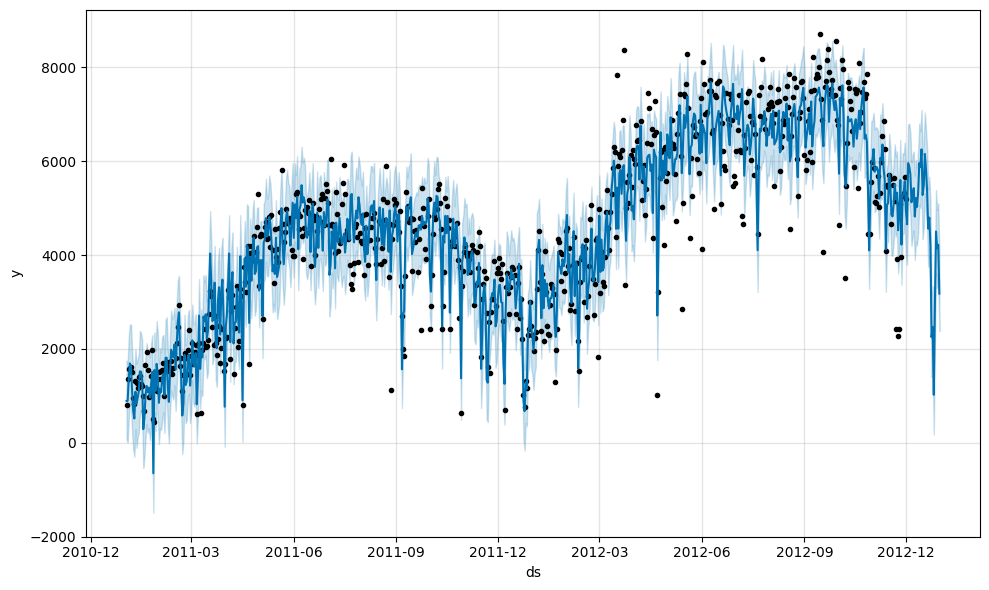

In [151]:
# Visualize forecast plot with uncertainty bounds
m.plot(forecast)
plt.show()